In [15]:
from scipy.spatial import HalfspaceIntersection, ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

def drew_inequalities(halfspaces, feasible_point, xlim, ylim):
    hs = HalfspaceIntersection(np.array(halfspaces), np.array(feasible_point))
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    x = np.linspace(*xlim, 100)

    for h in halfspaces:
        if h[1]== 0:
            ax.axvline(-h[2]/h[0], color="#2c3e50")
        else:
            ax.plot(x, (-h[2]-h[0]*x)/h[1], color="#2c3e50")
    x, y = zip(*hs.intersections)
    points = list(zip(x, y))
    convex_hull = ConvexHull(points)
    polygon = Polygon([points[v] for v in convex_hull.vertices], color="#000000")
    ax.add_patch(polygon)
    ax.plot(x, y, 'o', color="#e63222")
    plt.show()

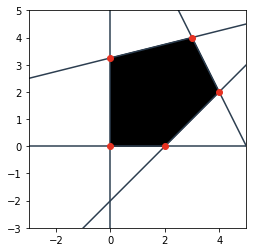

In [16]:
halfspaces = [
    [-1, 0, 0],   # x₁ ≥ 0
    [0, -5, 0],   # 5x₂ ≥ 0
    [-1, 4, -13], # 4x₂ - x₁ ≤ 13
    [2, 1, -10],  # x₂ + 2x₁ ≤ 10
    [1,-1,-2]     # x₁ + x₂ ≤ 2
    ]
    
feasible_point = [0.5, 0.5]
# זום לצירים
xlim = (-3,5)
ylim = (-3,5)

drew_inequalities(halfspaces, feasible_point, xlim, ylim)
